## 100DaysOfBytewise - Machine Learning Fellowship

## . Predicting Employee Attrition Using Logistic Regression
## Dataset: 
### HR Analytics Employee Attrition Dataset
## Preprocessing Steps:
### - Handle missing values if any.
### - Encode categorical variables (e.g., one-hot encoding for department, gender, etc.).
### - Standardize numerical features.
## Task: 
### Implement logistic regression to  predict employee attrition and evaluate the model using precision, recall, and F1-score.


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

# Load the dataset
emp_data = pd.read_csv('employee.csv')

# Display the first few rows
print(emp_data.head())

# Check for missing values
missing_values = emp_data.isnull().sum()
print("Missing values:\n", missing_values)

# Columns to encode
encoding_columns = [
    'city_name',
    'department_name',
    'job_title',
    'gender_short',
    'gender_full',
    'termreason_desc',
    'termtype_desc',
    'STATUS',
    'BUSINESS_UNIT'
]

# Columns to exclude from numerical columns
exclude_columns = [
    'EmployeeID',
    'recorddate_key',
    'birthdate_key',
    'orighiredate_key',
    'terminationdate_key',
    'store_name'
] + encoding_columns

# Identify numerical columns
numerical_columns = emp_data.columns.difference(exclude_columns)

# Fill missing values for numerical columns with median
emp_data[numerical_columns] = emp_data[numerical_columns].apply(pd.to_numeric, errors='coerce').fillna(emp_data[numerical_columns].median())

# Define the features (X) and the target (y)
X = emp_data.drop(['EmployeeID', 'STATUS', 'recorddate_key', 'birthdate_key', 'orighiredate_key', 'terminationdate_key'], axis=1)
y = emp_data['STATUS']

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[encoding_columns])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(encoding_columns))

# Drop original categorical columns and concatenate the encoded columns
X = X.drop(encoding_columns, axis=1)
X = pd.concat([X.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Standardize numerical features
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)



#### 2. Classifying Credit Card Fraud Using Decision Trees
  #### Dataset: Credit Card Fraud Detection Dataset
  #### Preprocessing Steps:
  ####   - Handle missing values if any.
  ####  - Standardize features.
  #### Task: Implement a decision tree classifier to classify credit card transactions as fraud or not and evaluate the model using ROC-AUC and confusion matrix.

ROC-AUC Score: 0.9995777914682679
Confusion Matrix:
[[56722    28]
 [   20 56956]]


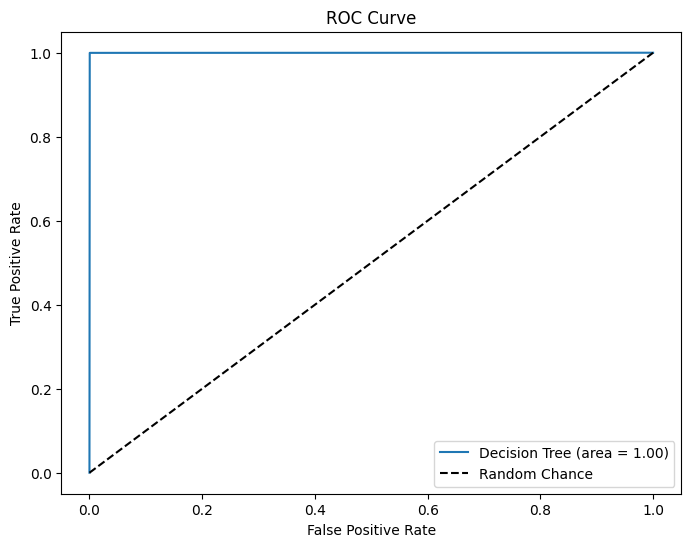

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Step 1: Load the dataset

df = pd.read_csv('creditcard_2023.csv')

# Step 2: Handle missing values 
df.fillna(df.mean(), inplace=True)

# Step 3: Standardize features
features = df.drop(columns=['Class'])
target = df['Class']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Step 5: Implement a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Predict and evaluate the model
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC Score: {roc_auc}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### Predicting Heart Disease Using Logistic Regression
####   Dataset: Heart Disease Dataset
####     Preprocessing Steps:
####       - Handle missing values (e.g., fill missing values with mean).
####       - Encode categorical variables (e.g., one-hot encoding for gender, chest pain type, etc.).
####       - Standardize numerical features.
####     Task: Implement logistic regression to predict heart disease and evaluate the model using accuracy and ROC-AUC.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0    

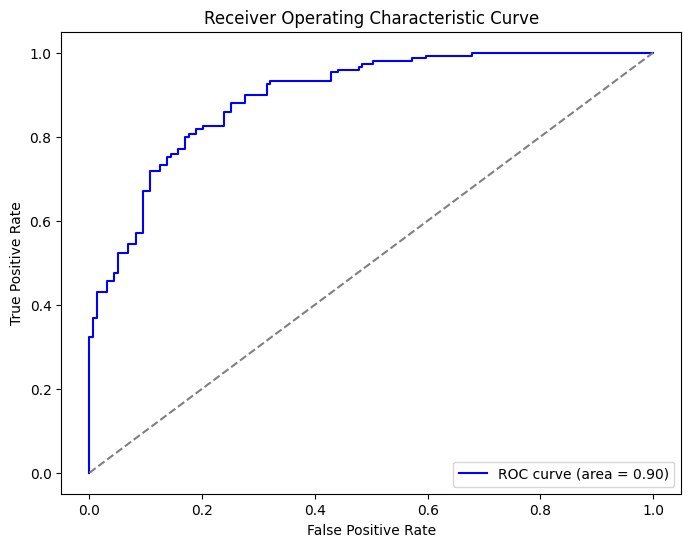

In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart.csv')

# Display basic info and first few rows
print(df.info())
print(df.head())

# List of numerical columns to standardize
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC: {roc_auc:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()


#### Classifying Emails as Spam Using Decision Trees
####    Dataset: Spam Email Dataset
####    Preprocessing Steps:
####      - Handle missing values if any.
####      - Standardize features.
####      - Encode categorical variables if present.
####    Task: Implement a decision tree classifier to classify emails as spam or not and evaluate the model using precision, recall, and F1-score.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('email.csv')

# Display basic info and first few rows
print(df.info())
print(df.head())

# Check for missing values
missing_info = df.isnull().sum()
print(missing_info[missing_info > 0])

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Fill missing values for numeric columns with mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values for categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Identify numerical columns for standardization
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Ensure numerical_cols contains valid columns and DataFrame is not empty
print("Numerical Columns:")
print(numerical_cols)

if len(numerical_cols) > 0:
    # Check if there is any data in the numerical columns
    print("Numerical Data Sample:")
    print(df[numerical_cols].head())

    # Initialize and apply StandardScaler
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
else:
    print("No numerical columns to standardize.")

# Check column names before dropping 'target'
print("Column Names Before Dropping Target:")
print(df.columns)

# Define features and target variable
target_col = 'target'  # Update this if the target column has a different name
if target_col in df.columns:
    X = df.drop(target_col, axis=1)
    y = df[target_col]

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train the decision tree classifier
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate and print precision, recall, and F1-score
    print(classification_report(y_test, y_pred))

    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
else:
    print(f"Column '{target_col}' not found in the DataFrame.")


#### Predicting Customer Satisfaction Using Logistic Regression
####    Dataset: Customer Satisfaction Dataset
####    Preprocessing Steps:
####      - Handle missing values (e.g., fill missing values with median).
####      - Encode categorical variables (e.g., one-hot encoding for region).


In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv('satisfaction.csv')

# Display basic info and first few rows
print(df.info())
print(df.head())

# Fill missing values if any
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

categorical_cols = df.select_dtypes(exclude=['number']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'VisitFrequency', 'PreferredCuisine', 
                                          'TimeOfVisit', 'DiningOccasion', 'MealType'], drop_first=True)

# Define features and target variable
X = df_encoded.drop(['CustomerID', 'HighSatisfaction'], axis=1)  # Drop CustomerID as it's not a feature
y = df_encoded['HighSatisfaction']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and apply StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print accuracy, precision, recall, and F1-score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        